# Brownian Motion for Financial Math

<b> YouTube Tutorial </b> (Published: Sep 10, 2021): https://youtu.be/fIM_AQbBOm4

In this tutorial we will investigate the stochastic process that is the building block of financial mathematics. We will consider a symmetric random walk, scaled random walk and browian motion. The mathematic notation and explanations are from Steven Shreve's book Stochastic Calculus for Finance II.

Important properties of brownian motion is that it is a martingale (Markov process) and that it accumulates quadratic variation at rate one per unit time.

Note: Quadratic Variation is perhaps what makes Stochastic Calculus so different from Ordinary Calculus.

In [ ]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Brownian Motion

A Brownian motion is a stochastic process ${\{W_t\}}_{t \in [0,T]}$

Filtered probability space $(\Omega, \mathcal{F}, \mathbb{P}, \{\mathcal{F}_t\}_{t \in [0,T]})$

$W: [0,T] \times \Omega \rightarrow \mathbb{R}$

1. $W_0 = 0$
2. W has independent increments
3. W has Gaussian (normal) increments
4. W has continuous sample paths (almost surely).

## Symmmetric Random Walk

Picture you have successive coin tosses, $\omega = \omega_1\omega_2\omega_3 ...$
Where $\omega_n$ is the outcome of the $n^{th}$ toss.

$X_j =
\begin{cases}
    1                & \text{if } \omega_j = H\\
    -1               & \text{if } \omega_j = T\\
\end{cases}$

If we define $M_0 = 0,$

$\begin{equation}
M_k = \sum_{j=1}^{k}X_j
\end{equation}$

In [ ]:
# Parameters
M = 10 # number of simulations
t = 10 # Time

In [ ]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

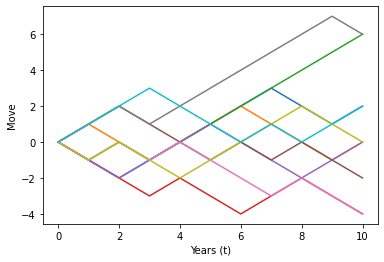

In [ ]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

## Properties of a Symmetric Random Walk

1. Independent Increments
     - $ 0 = k_0 < k_1 < k_2 < ... < k_m$
     - $ M_{k_1} = (M_{k_1} - M_{k_0}),(M_{k_2} - M_{k_1}), ... ,(M_{k_m} - M_{k_{m-1}})$
     - $\DeclareMathOperator{\E}{\mathbb{E}}\E{(M_{k_{i+1}} - M_{k_{i}})} = 0$
     - $Var(M_{k_{i+1}} - M_{k_{i}}) = k_{i+1}-k_i$
     - Variance accumulates at rate one per unit time


2. Martingale
     - Conditional expectation of next value in sequence is current position    
     - $ 0 < k < l < T$  
     - $\DeclareMathOperator{\E}{\mathbb{E}}\E{[...|F_k]}$ is the conditional expectation based on information up to time k. F_k is a filtration, the $\sigma$-algebra of information corresponding to first k coin tosses.
      

         $\begin{align} \DeclareMathOperator{\E}{\mathbb{E}}
                     \E{[M_l|F_k]} & = \E{[(M_l - M_k) + M_k|F_k]} \\
                     & = \E{[(M_l - M_k|F_k]} + \E{[M_k|F_k]} \\
                     & = \E{[M_l - M_k|F_k]} + M_k \\
                     & = M_k \\
                 \end{align}$

3. Quadratic variation
     - Computed Path-by-Path, one increment at a time
     - $[M,M]_k = \sum_{j=1}^k(M_j - M_{j-1})^2 = k$

In [ ]:
# Create Quadratic variation and Variance functions
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)

In [ ]:
[quadratic_variation(path) for path in rw_paths.T[:4]]

[10.0, 10.0, 10.0, 10.0]

In [ ]:
# Change the number of simulation to 10,000,000 to observe variance convergence on Time
[variance(path) for path in rw_paths[1:11]]

[0.96, 2.4, 2.44, 1.6, 2.56, 4.64, 6.24, 6.56, 9.44, 11.24]

## Scaled Symmmetric Random Walk

To approximate a Browian Motion we can spped up time and scale down the step size.

$\begin{equation}
W^{(n)}(t) = \frac{1}{\sqrt{n}}M_{nt}
\end{equation}$

In [ ]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10

In [ ]:
random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

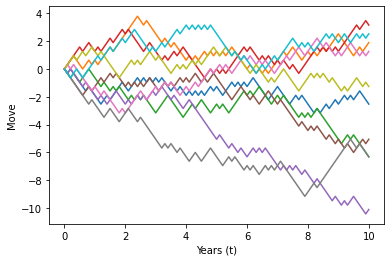

In [ ]:
time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [ ]:
# Change the number of simulation to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_paths[1:11]]

[0.096, 0.276, 0.5, 0.644, 0.996, 1.156, 1.284, 1.696, 1.764, 1.796]

In [ ]:
[quadratic_variation(path) for path in srw_paths.T[:4]]

[10.0, 10.0, 10.0, 10.0]

## Limit of Binomial Distribution

As n increases, the binomial distribution converges to the normal distribution with variance t.

$\begin{equation}
W^{(n)}(t) = \frac{1}{\sqrt{n}}M_{nt}
\end{equation}$

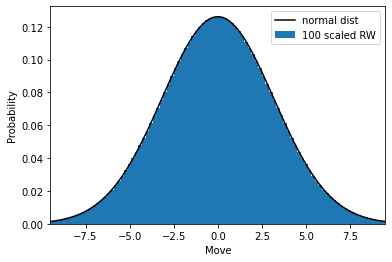

In [ ]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution
n = 100
t = 10

# Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms],outcomes[1]-outcomes[0],
        label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='normal dist')

plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

## Brownian Motion

$\lim_{n \to \infty} W^{(n)}(t) \sim N(0,t)$

A Brownian motion is a stochastic process ${\{W_t\}}_{t \in [0,T]}$

Filtered probability space $(\Omega, \mathcal{F}, \mathbb{P}, \{\mathcal{F}_t\}_{t \in [0,T]})$

$W: [0,T] \times \Omega \rightarrow \mathbb{R}$

1. $W_0 = 0$
2. W has independent increments
3. W has Gaussian (normal) increments
4. W has continuous sample paths (almost surely).

$W_t \sim N(0,t)$

- $\DeclareMathOperator{\E}{\mathbb{E}}\E{(W_{t_{i+1}} - W_{t_{i}})} = 0$
- $Var(W_{t_{i+1}} - W_{t_{i}}) = t_{i+1}-t_i$

In [ ]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step

In [ ]:
steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

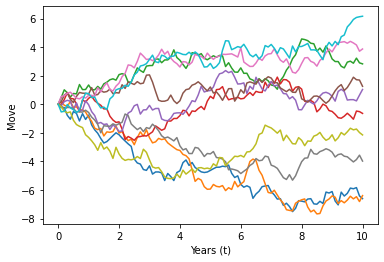

In [ ]:
time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [ ]:
# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]

[11.536, 10.835, 9.811, 9.922]

In [ ]:
# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]

[0.096, 0.244, 0.335, 0.282, 0.296, 0.386, 0.7, 0.575, 0.862, 1.049]